In [8]:
import numpy as np
import matplotlib.pyplot as plt

# The Question 

- Find the expression for the band dispersion for a 2D square lattice (with a lattice constant $a$) within the empty lattice approximation.

Let a = 2π (a.u.), plot the band structure of the first 5 bands from M to Γ and then from Γ to X. (The Brillouin zone is shown below.)

In [9]:

# Number of points along the path
num_points = 1000
t_values = np.linspace(-1, 1, num_points)

# Lattice constant
a = 2*np.pi  # Substitute with actual lattice constant if known

# Reciprocal coordinates of M and Gamma points
k_M = np.array([np.pi / a, np.pi / a])
k_Gamma = np.array([0, 0])

# Compute k-points along the M-Gamma path
k_points = np.array([(1 - t) * k_M + t * k_Gamma for t in t_values])


In [10]:
# Constants (assuming some values for simplicity; you can replace with actual values)
hbar = 1  # Planck constant divided by 2*pi
m = 1     # Electron mass

# Define reciprocal lattice vectors G for the first five bands
G_vectors = [
    np.array([0, 0]),
    np.array([2 * np.pi / a, 0]),
    np.array([0, 2 * np.pi / a]),
    np.array([-2 * np.pi / a, 0]),
    np.array([0, -2 * np.pi / a])
]

# Calculate energy for each band at each k-point
energies = []
for G in G_vectors:
    band_energies = []
    for k in k_points:
        energy = (hbar**2 / (2 * m)) * np.linalg.norm(k + G)**2
        band_energies.append(energy)
    energies.append(band_energies)


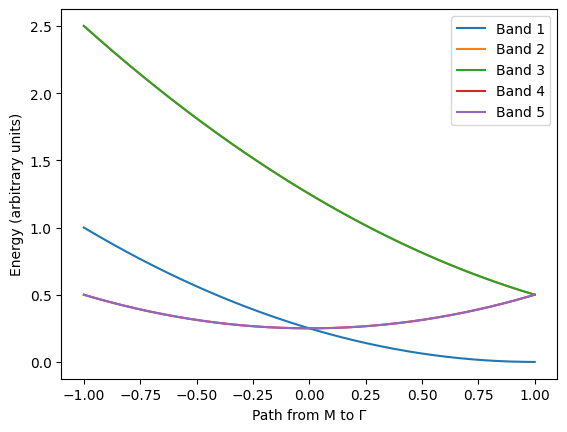

In [11]:
import matplotlib.pyplot as plt

# Plot the energies for each band
for i, band_energies in enumerate(energies):
    plt.plot(t_values, band_energies, label=f'Band {i+1}')

plt.xlabel("Path from M to Γ")
plt.ylabel("Energy (arbitrary units)")
plt.legend()
plt.show()


In [12]:
# Number of points along each path
num_points = 1000
t_values = np.linspace(0, 3, num_points)

# Compute k-points along the Gamma-X path
k_X = np.array([np.pi / a, 0])
k_points_Gamma_X = np.array([t * k_X for t in t_values])


In [13]:
# Calculate energy for each band at each k-point along Gamma-X path
energies_Gamma_X = []
for G in G_vectors:
    band_energies = []
    for k in k_points_Gamma_X:
        energy = (hbar**2 / (2 * m)) * np.linalg.norm(k + G)**2
        band_energies.append(energy)
    energies_Gamma_X.append(band_energies)


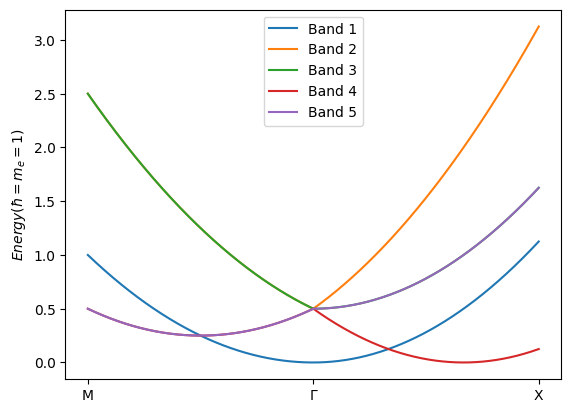

In [14]:

# Concatenate the energies along both paths
all_energies = [energies[i] + energies_Gamma_X[i] for i in range(5)]

# Create a path distance array for x-axis: 0 to 1 for M->Gamma, 1 to 2 for Gamma->X
path_distance_M_Gamma = np.linspace(0, 1, num_points)
path_distance_Gamma_X = np.linspace(1, 2, num_points)
path_distance = np.concatenate((path_distance_M_Gamma, path_distance_Gamma_X))

# Plot the energies for each band along the combined path
for i, band_energies in enumerate(all_energies):
    plt.plot(path_distance, band_energies, label=f'Band {i+1}')

# Add labels and title
plt.xticks([0, 1, 2], ['M', 'Γ', 'X'])
plt.ylabel(r"$Energy (\hbar = m_e = 1)$")
plt.legend()
plt.show()
